In [1]:
#### LOAD PACKAGES ###

import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as ss
import statsmodels.api as sm
import math
import scipy.cluster.hierarchy as sch
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.weightstats as ws
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation

sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
%matplotlib inline 

In [3]:
#Loading up Boston housing data

from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Converting Boston housing data into data frames
boston_df = pd.DataFrame(data=boston.data)

In [5]:
#Let us clean our data little bit, So first check which are the columns the contains NaN values in it :
boston_df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

'''
Once the above code is executed, all the columns should give False, In case for any column is True result, then remove 
all the null values from that column using below code.

'''

boston_df = boston_df.fillna(method='ffill')

In [6]:
#Print out of first 5 rows of Boston housing data using head() method
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# boston.keys()

"""
The Boston dataset is a dictionary which holds keys and values for each key. We can view the keys from the Boston dataset 
with the keys() method.

This is the details under the dataset. 
1. data is the actual data. 
2. feature_names are the name of the columns of data.
3. target is the dependant variable which is the price of the houses. 
4. DESCR gives the details of the dataset. We can access all details under the keys using 'dot' operator
"""

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [8]:
# boston.data.shape
#The data.shape method will return the column size and the size of the dataset. That is the total number of rows and columns

print(boston.data.shape)

(506, 13)


In [9]:
#boston.feature_names
"""
From this output, we must know the 13 column and what each column means for the dataset. The feature_names method will provide 
the feature names of the columns.
"""
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
#boston.DESCR
#The DESCR method will provide the dataset characteristics for the Boston dataset.

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
#Using boston_df.columns and boston.feature_names
#Now let’s add the column names by using the feature_names method and pass the column names into boston_pf.

boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#boston.target.shape
'''
Up to this stage there is no column called ‘PRICE’ (MEDV) in the data frame? Yes, it is because the target column is 
available in other attribute called target. So let’s check the shape of the 
boston.target.
'''

print(boston.target.shape)

(506,)


In [13]:
#boston.target
'''
So, it turns out that it match the number of rows in the dataset. Let’s add it to the DataFrame.
'''

boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#Summary Statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
'''
Requirements

For this project you should produce a Python or R notebook. There are two sets of specific questions as well as an 
open-ended experimental design. Your project will be evaluated on how well it answers the questions and on the quality 
of the experimental design:
 

1. Choose a variable other than CHAS and MEDV (the target, median home price).
        1. Compute the mean and standard deviation of the variable.
        2. Plot a histogram of the variable.
        3. What is the sample correlation between your chosen variable and median home price?
        4. Perform a regression, predicting MEDV from your chosen variable.
 
2. You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those
   that do not.
        1 What is the null hypothesis?
        2. Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.
        3. What is the 90% confidence interval for the target (price) of tracts that border the Charles River?
        4. Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?
 
3. Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. Be creative
with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. 
Design an experiment to explore the effects of these features on the media house price in census tracts. You should include an
explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power.
Be sure to apply the knowledge you learned in the Data Science Research Methods courses.


Submission

When you have completed the project, email your instructor a single notebook (R or Python). Include text blocks that describe 
how you answered the questions and your experimental design as well as any necessary code blocks.
'''

1. Choose a variable other than CHAS and MEDV (the target, median home price).
        1. Compute the mean and standard deviation of the variable.
        2. Plot a histogram of the variable.
        3. What is the sample correlation between your chosen variable and median home price?
        4. Perform a regression, predicting MEDV from your chosen variable.
        
The selected variable is NOX (nitric oxides concentration (parts per 10 million))

In [15]:
boston_df['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [16]:
boston_df['NOX'].mean()

0.5546950592885372

In [17]:
boston_df['NOX'].std()

0.11587767566755611

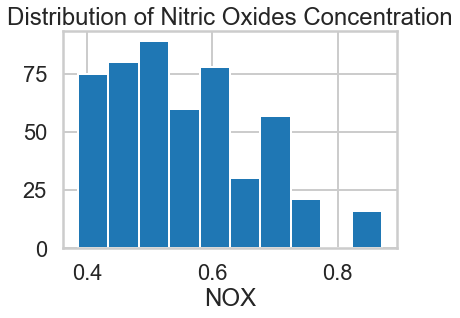

In [18]:
# Plotting distribution of NOX
plt.hist(boston_df['NOX'])
plt.xlabel('NOX')
plt.title('Distribution of Nitric Oxides Concentration')

plt.show()

In [19]:
skew = ss.skewtest(boston_df.NOX)
skew

SkewtestResult(statistic=6.120888755934693, pvalue=9.30548555733988e-10)

People disagree about what is acceptable skew, but usually a value less than +/- 1.0 raises no alarms. Further, the p-value 
is rather small indicating that we can reject the null hypothesis that there is no skew. 

The histogram is skewed to the right (positively skewed) and we must address it. We could address the skew by transforming 
the variable. 

Correlations are based on variance, so anything that biases a mean (e.g., skew) also interferes with the correlation. 
In general, skew reduces correlations. For a more robust test of the correlation, you can transform the data by performing a 
mathematical operation to every score. There are many such operations we can try. In general, taking the square root of every 
score reduces skew, but the catch is that the variable must be positively skewed and no scores may be negative. 


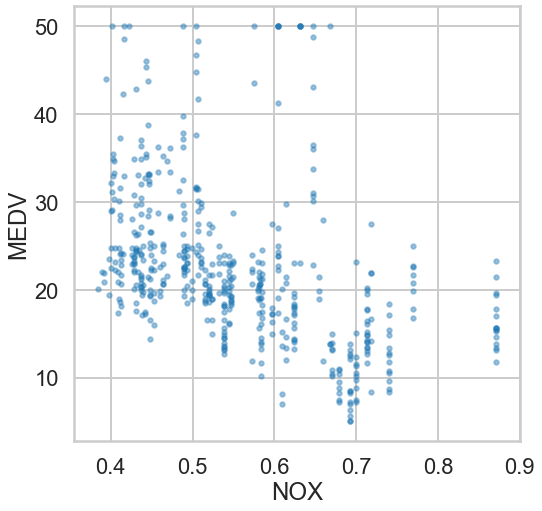

In [20]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
boston_df.plot.scatter(x = 'NOX', y = 'MEDV', ax = ax, alpha = 0.4)

In [21]:
corr = boston_df[['NOX', 'MEDV']].corr()
print(corr.round(3))
print()
print(corr.iloc[1,0].round(3))
#print()
#boston_df.corr()['NOX']
#boston_df['PRICE'].corr()['NOX']

        NOX   MEDV
NOX   1.000 -0.427
MEDV -0.427  1.000

-0.427


In [22]:
'''
Significance Test

If we want to test the correlation for significance, we can use the 'pearsonr' function from the scipy.stats modules. 
The confidence intervals can be computed using the methods in the functions below.
'''

def r_z(r): ## transform distribution
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z): ## inverse transform distribution 
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

def correlation_sig(df, col1, col2):
    pearson_cor = ss.pearsonr(x = df[col1], y = boston_df[col2])
    conf_ints = r_conf_int(pearson_cor[0], 0.05, 1000)
    print('Correlation = %4.3f with CI of %4.3f to %4.3f and p_value %4.3e' 
        % (pearson_cor[0], conf_ints[0], conf_ints[1], pearson_cor[1]))
    
correlation_sig(boston_df, 'NOX', 'MEDV') 

Correlation = -0.427 with CI of -0.477 to -0.375 and p_value 7.065e-24


Since the P-value is smaller than 0.05 we can reject the null hypothesis that the correlation between NOX and MEDV is insignificant. The CI also does not include zero (0) and hence a rejection of the null hypothesis

A Simple Linear Regression using NOX and MEDV






'''xxxxx   Linear Regression Model Training  xxxxx'''

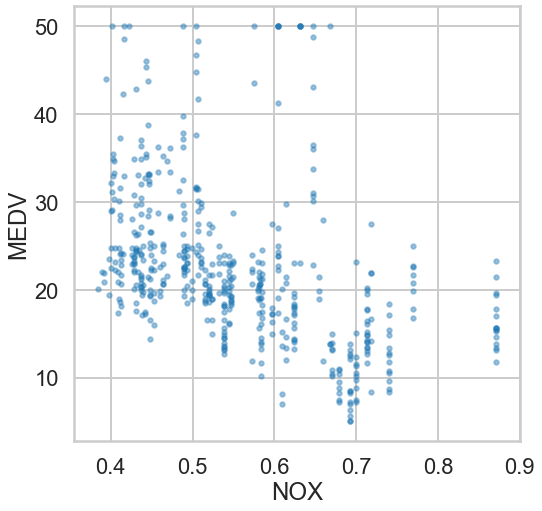

In [23]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
boston_df.plot.scatter(x = 'NOX', y = 'MEDV', ax = ax, alpha = 0.4)

Range of Price (MEDV) = { 5.0 50.0}


Text(0.5, 0, 'MEDV')

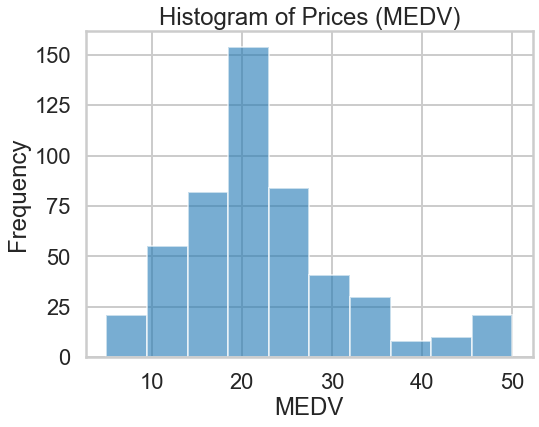

In [25]:
print('Range of Price (MEDV) = { ' + str(min(boston_df.MEDV)) + ' ' + str(max(boston_df.MEDV)) + '}')

ax = plt.figure(figsize=(8, 6)).gca() # define axis
boston_df.MEDV.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of Prices (MEDV)')
plt.xlabel('MEDV')

In [26]:
dfx = boston_df['NOX'].values.reshape(-1,1)
dfy = boston_df['MEDV'].values.reshape(-1,1)

In [28]:
'''
Now, we can finally split the dataset into train and test with the snippet below.
'''

#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.3, random_state = 5)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(dfx, dfy, test_size = 0.3, 
                                                                            random_state = 5)
#X_train, X_test, Y_train, Y_test = sklearn.model_selection.cross_validate(X, Y, test_size = 0.3, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [29]:
'''
If we also check the shape of each variable, we can find that now we already got ourselves our train and test datasets 
with the proportion of 66.66% for train data and 33.33% for test data.



Linear Regression

We finally going to run a linear regression. Don’t forget to import the LinearRegression.

The above snippet will fit a model based on X_train and Y_train. Now we already got the linear model, we try to predict it 
to the X_test and now we got the prediction values which stored into Y_pred. To visualize the differences between actual prices 
and predicted values we also create a scatter plot.

'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, Y_train)

#Y_pred = linR.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#To retrieve the intercept:
print(linR.intercept_)
#For retrieving the slope:
print(linR.coef_)

[42.03902633]
[[-35.33784418]]


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [31]:
y_pred = linR.predict(X_test)

In [32]:
#Now compare the actual output values for X_test with the predicted values, execute the following script:

df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37.6,24.228753
1,27.9,27.515172
2,22.6,24.758821
3,13.8,18.433346
4,35.2,25.642267
...,...,...
147,18.7,26.030983
148,19.8,23.663347
149,22.5,27.903889
150,13.3,19.988212


We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

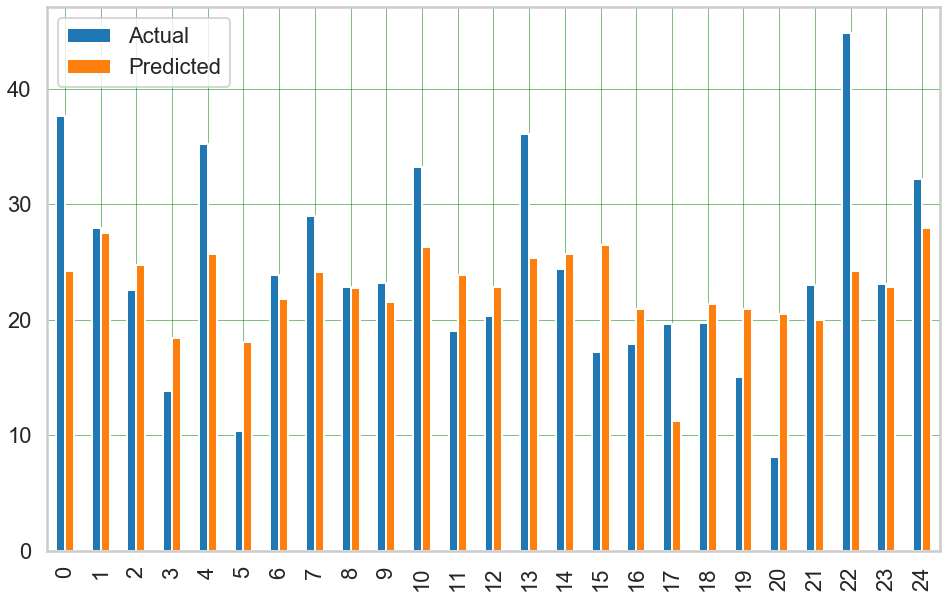

In [33]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

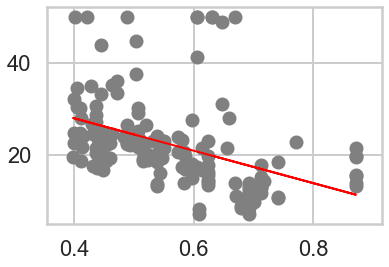

In [34]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
2. Mean Squared Error (MSE) is the mean of the squared errors
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us. Let’s find the values for these metrics using our test data.

In [35]:
'''
Mean Squared Error
To check the level of error of a model, we can Mean Squared Error. It is one of the procedure to measures the average of the 
squares of error. Basically, it will check the difference between actual value and the predicted value. For the full theory, 
you can always search it online. To use it, we can use the mean squared error function of scikit-learn by running this snippet 
of code.

'''
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

#mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
#print(mse)

Mean Absolute Error: 6.205519685630123
Mean Squared Error: 82.13275450179698
Root Mean Squared Error: 9.062712314853483


In [37]:
#the accuracy of the prediction is found to be 13.62% 
linR.score(X_test,Y_test)

0.13623776885389827

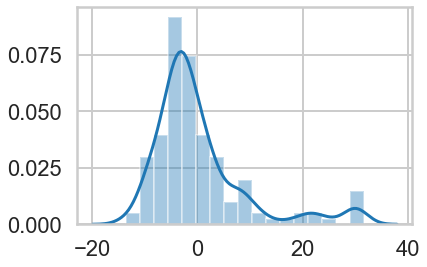

In [38]:
error = Y_test - y_pred

#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

Text(0.5, 0, 'Predicted values')

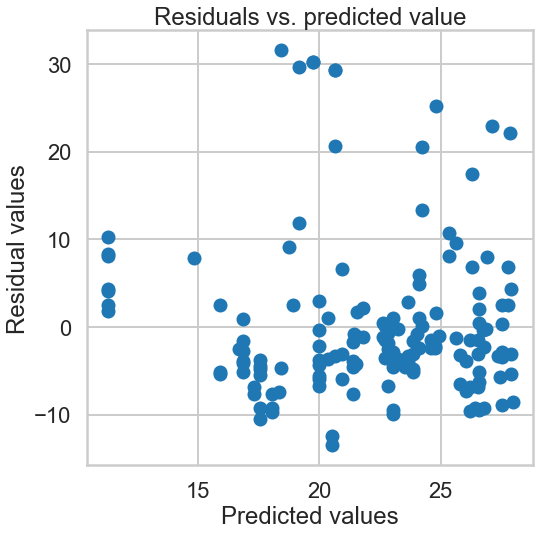

In [39]:
# Create a new data frame with the predictor value and the constant
ax = plt.figure(figsize=(8, 8)).gca() # define axis
#new_predict.plot.scatter(x='Score',y='Residuals', ax = ax)
plt.scatter(y_pred, error)
plt.title('Residuals vs. predicted value')
plt.ylabel("Residual values")
plt.xlabel('Predicted values')

In [40]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(X_train, prepend = False)

lm_mod = sm.OLS(Y_train, predictors)
res = lm_mod.fit()

#print(predictors.head(30))
#print()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     91.13
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.34e-19
Time:                        14:08:01   Log-Likelihood:                -1236.8
No. Observations:                 354   AIC:                             2478.
Df Residuals:                     352   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -35.3378      3.702     -9.546      0.0

TRANSFORMATION

'''
Now we can perform any number of operations. The square root is the most mild transformation. We can also take the natural 
log of every score (no values may be zero!). In general, these operations reduce big numbers more than small numbers and thus 
rein in the long tail. The Pandas apply method is used to apply the math.sqrt function to each element.
'''

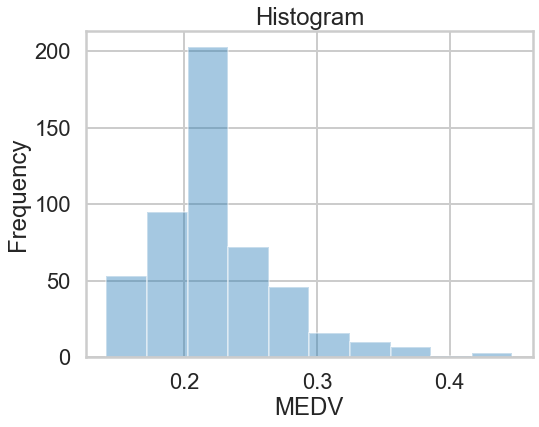

In [42]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


#boston_df['PRICE_t'] = boston_df.PRICE.apply(math.log)
#boston_df['PRICE_t'] = boston_df.PRICE.apply(math.log10)
boston_df['MEDV_t'] = boston_df['MEDV']**(-0.5)
#boston_df['PRICE_t'] = (boston_df['PRICE']-min(boston_df['PRICE']))/(max(boston_df['PRICE'])-min(boston_df['PRICE']))

ax = plt.figure(figsize=(8, 6)).gca() # define axis
boston_df.MEDV_t.plot.hist(ax = ax, alpha = 0.4)
plt.title('Histogram')
plt.xlabel('MEDV')

dfx = boston_df['NOX'].values.reshape(-1,1)
dfyT = boston_df['MEDV_t'].values.reshape(-1,1)

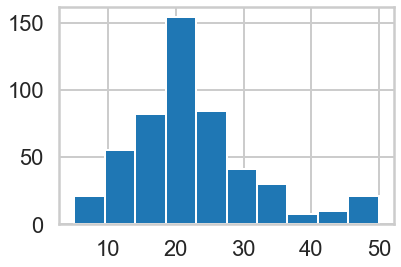

In [43]:
plt.hist(dfy)
plt.show()

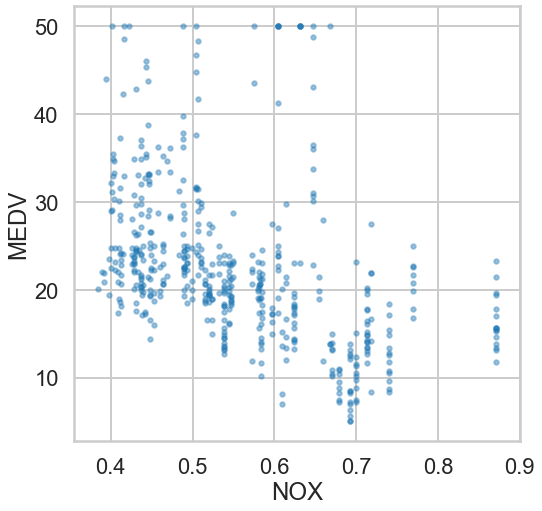

In [44]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
boston_df.plot.scatter(x = 'NOX', y = 'MEDV', ax = ax, alpha = 0.4)

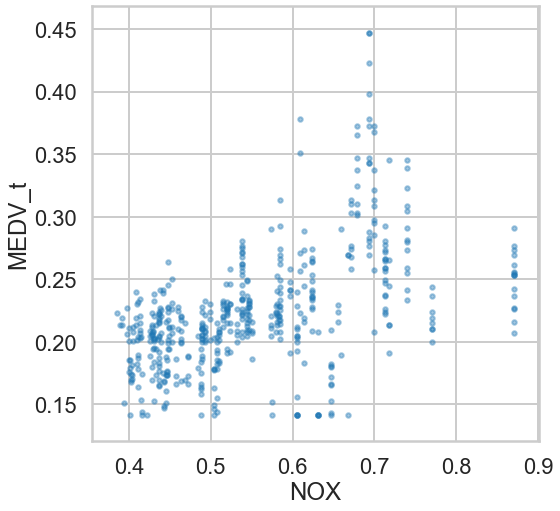

In [45]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
boston_df.plot.scatter(x = 'NOX', y = 'MEDV_t', ax = ax, alpha = 0.4)

In [46]:
#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.3, random_state = 5)
X_train, X_test, Y_trainT, Y_testT = sklearn.model_selection.train_test_split(dfx, dfyT, test_size = 0.3, 
                                                                            random_state = 5)
#X_train, X_test, Y_train, Y_test = sklearn.model_selection.cross_validate(X, Y, test_size = 0.3, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_trainT.shape)
print(Y_testT.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, Y_trainT)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#To retrieve the intercept:
print(linR.intercept_)
#For retrieving the slope:
print(linR.coef_)

[0.09842609]
[[0.22723182]]


In [56]:
y_predT = linR.predict(X_test)

dfT = pd.DataFrame({'Actual': Y_testT.flatten(), 'Predicted': y_predT.flatten()})
dfT

,Actual,Predicted
0,0.163082,0.212951
1,0.189321,0.191818
2,0.210352,0.209542
3,0.269191,0.250217
4,0.168550,0.203862
...,...,...
147,0.231249,0.201362
148,0.224733,0.216587
149,0.210819,0.189319
150,0.274204,0.240219


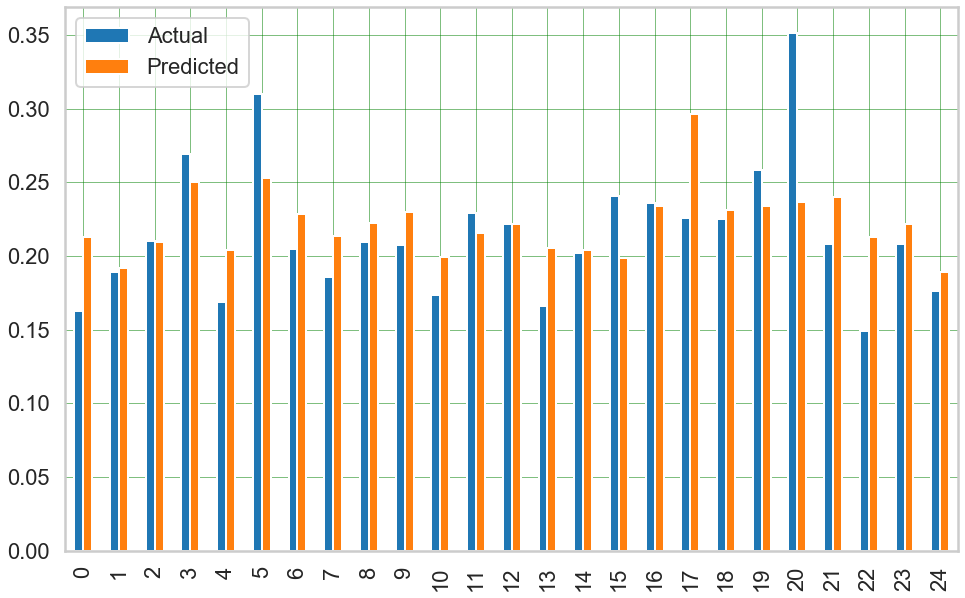

In [57]:
df1 = dfT.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

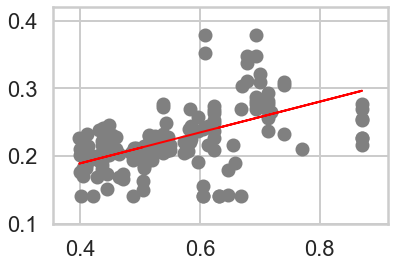

In [58]:
plt.scatter(X_test, Y_testT,  color='gray')
plt.plot(X_test, y_predT, color='red', linewidth=2)
plt.show()

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_testT, y_predT))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_testT, y_predT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_testT, y_predT)))

Mean Absolute Error: 0.029185836809044262
Mean Squared Error: 0.001693892612458167
Root Mean Squared Error: 0.041156926664392315


In [60]:
#the accuracy of the prediction is found to be 23.60% 
linR.score(X_test,Y_testT)

0.23607250283267067

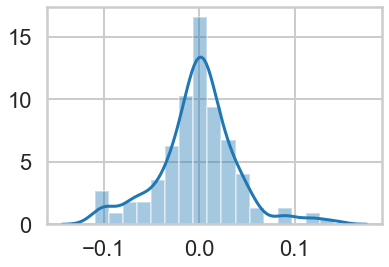

In [61]:
errorT = Y_testT - y_predT

#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(errorT)

Text(0.5, 0, 'Predicted values')

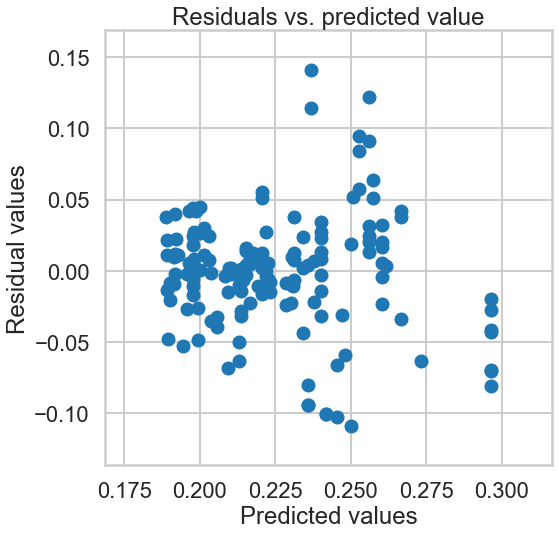

In [62]:
# Create a new data frame with the predictor value and the constant
ax = plt.figure(figsize=(8, 8)).gca() # define axis
#new_predict.plot.scatter(x='Score',y='Residuals', ax = ax)
plt.scatter(y_predT, errorT)
plt.title('Residuals vs. predicted value')
plt.ylabel("Residual values")
plt.xlabel('Predicted values')

In [63]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(X_train, prepend = False)

lm_mod = sm.OLS(Y_trainT, predictors)
resT = lm_mod.fit()

#print(predictors.head(30))
#print()
print(resT.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.41e-27
Time:                        14:18:44   Log-Likelihood:                 626.99
No. Observations:                 354   AIC:                            -1250.
Df Residuals:                     352   BIC:                            -1242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2272      0.019     11.874      0.0

In [ ]:
'''
Requirements

For this project you should produce a Python or R notebook. There are two sets of specific questions as well as an 
open-ended experimental design. Your project will be evaluated on how well it answers the questions and on the quality 
of the experimental design:
 

1. Choose a variable other than CHAS and MEDV (the target, median home price).
        1. Compute the mean and standard deviation of the variable.
        2. Plot a histogram of the variable.
        3. What is the sample correlation between your chosen variable and median home price?
        4. Perform a regression, predicting MEDV from your chosen variable.
 
2. You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those
that do not.
        1. What is the null hypothesis?
        2. Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.
        3. What is the 90% confidence interval for the target (price) of tracts that border the Charles River?
        4. Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?
 
3. Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. Be creative
with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. 
Design an experiment to explore the effects of these features on the media house price in census tracts. You should include an
explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power.
Be sure to apply the knowledge you learned in the Data Science Research Methods courses.


Submission

When you have completed the project, email your instructor a single notebook (R or Python). Include text blocks that describe 
how you answered the questions and your experimental design as well as any necessary code blocks.
'''

2. You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those
that do not.
       
    
        1. What is the null hypothesis?
        2. Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.
        3. What is the 90% confidence interval for the target (price) of tracts that border the Charles River?
        4. Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?

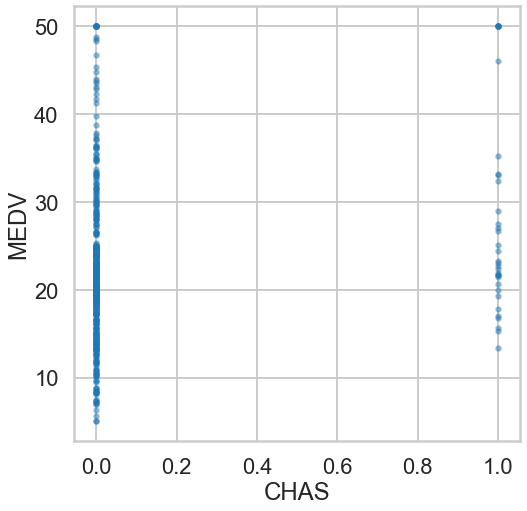

In [65]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
boston_df.plot.scatter(x = 'CHAS', y = 'MEDV', ax = ax, alpha = 0.4)

In [67]:
corr = boston_df[['CHAS', 'MEDV']].corr()
print(corr.round(3))
print()
print(corr.iloc[1,0].round(3))

       CHAS   MEDV
CHAS  1.000  0.175
MEDV  0.175  1.000

0.175


In [68]:
'''
Significance Test

If we want to test the correlation for significance, we can use the 'pearsonr' function from the scipy.stats modules. 
The confidence intervals can be computed using the methods in the functions below.
'''

def r_z(r): ## transform distribution
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z): ## inverse transform distribution 
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

def correlation_sig(df, col1, col2):
    pearson_cor = ss.pearsonr(x = df[col1], y = boston_df[col2])
    conf_ints = r_conf_int(pearson_cor[0], 0.05, 1000)
    print('Correlation = %4.3f with CI of %4.3f to %4.3f and p_value %4.3e' 
        % (pearson_cor[0], conf_ints[0], conf_ints[1], pearson_cor[1]))
    
correlation_sig(boston_df, 'CHAS', 'MEDV') 

Correlation = 0.175 with CI of 0.115 to 0.235 and p_value 7.391e-05


P-value is less than 0.05 hence we can reject the null hypothesis that the correlation is insignificant

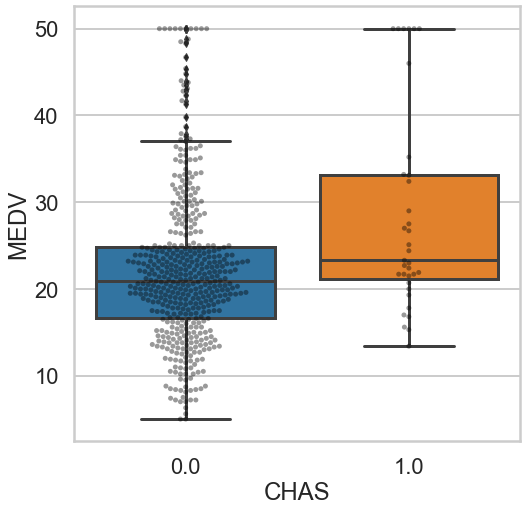

In [69]:
# boxplot
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'CHAS', y = 'MEDV', data = boston_df, ax = ax)
sns.swarmplot(x = 'CHAS', y = 'MEDV', color = 'black', data = boston_df, ax = ax, alpha = 0.4)

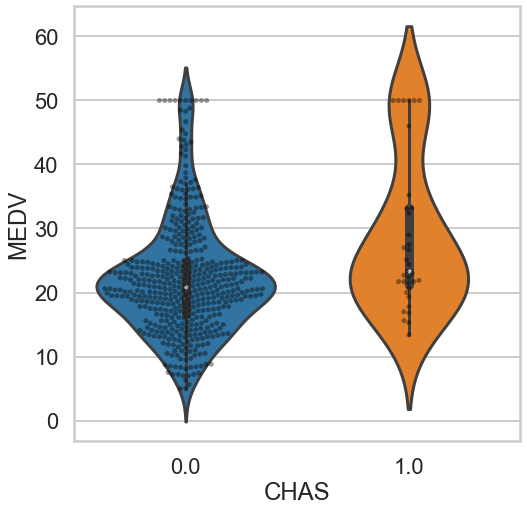

In [70]:
#A violin plot might also help to visualize the differences. The code in the cell below follows the same recipe used above, 
#but with the violinplot function.

ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.violinplot(x = 'CHAS', y = 'MEDV', data = boston_df, ax = ax)
sns.swarmplot(x = 'CHAS', y = 'MEDV', color = 'black', data = boston_df, ax = ax, alpha = 0.4)

In [74]:
'''
We can quickly compute some summary statistics. The Pandas groupby method groups the MEDV values by CHAS (Charles River dummy 
variable (= 1 if tract bounds river; 0 otherwise)) and the mean is then computed:
'''


CHAS_grouped = boston_df[['CHAS','MEDV']].groupby('CHAS')

print(' Mean by CHAS')
print(CHAS_grouped.mean().round(2))
print('\n Standard deviation by CHAS')
print(CHAS_grouped.std().round(2))
print('\n Standard deviation by CHAS')
print(CHAS_grouped.median().round(2))

 Mean by CHAS
       MEDV
CHAS       
0.0   22.09
1.0   28.44

 Standard deviation by CHAS
       MEDV
CHAS       
0.0    8.83
1.0   11.82

 Standard deviation by CHAS
      MEDV
CHAS      
0.0   20.9
1.0   23.3


It is evident that those with tracts that border the Charles River (CHAS) have higher median price of 23.3 (in $1,000s)

In [85]:
#First, we should find the number of samples in each group:

CHAS_grouped.count()


,MEDV
CHAS,
0.0,471
1.0,35


In [86]:
'''
The function below computes the t-test values. Several methods from different packages are used. The two subsets of the data 
frame are created using the loc method:
'''

def t_test_two_samp(a, b, alpha, alternative='two-sided'):
    
    diff = a.mean() - b.mean()

    res_tt = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res_tt[0], res_tt[1], confint[0], confint[1]], index = index)   
   

test = t_test_two_samp(boston_df.loc[boston_df.CHAS == 1, 'MEDV'], boston_df.loc[boston_df.CHAS == 0, 
                                                                                         'MEDV'], 0.05)
test

DegFreedom    36.876409
Difference     6.346157
Statistic      3.996437
PValue         0.000074
Low95CI        2.215483
High95CI      10.476831
dtype: float64

'''
The t-value of 3.996437 tells us that the difference is 3.996437 times the size of what one would typically expect by chance. This gives us our p-value. We see here that the p-value is 0.000074 less than 0.05. So by definition, we could not get a result this big in our sample 0.0074% of the time when the null hypothesis that there is NO difference is true. The t-value is statistically significant (since p-value is below .05 or 5%). Further, we see the confidence interval does not includes 0. We must reject the null hypothesis that this could plausibly be due to random chance. 

'''

In [91]:
# Computing the effect size (Cohen’s d) d value for the difference between CHAS(0) and CHAS(1):

d = (28.44 - 22.09)/(np.std(boston_df.loc[boston_df.CHAS == 1, 'MEDV']))
d

0.5452229936548547

In [92]:
#Now we have everything we need to compute the power of the t-test test:

tt_ind_solve_power(effect_size=d, nobs1 = 35, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.6135577642331449

4. Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?

In [93]:
#Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

44.5857902590805

A sample size of 45

3. Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. Be creative with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. Design an experiment to explore the effects of these features on the media house price in census tracts. You should include an explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power.

Be sure to apply the knowledge you learned in the Data Science Research Methods courses.


Submission
When you have completed the project, email your instructor a single notebook (R or Python). Include text blocks that describe 
how you answered the questions and your experimental design as well as any necessary code blocks.